In [3]:
# WEB SCRAPING

import requests
r = requests.get('https://www.fatsecret.com/calories-nutrition/food/soup')
c = r.content
from bs4 import BeautifulSoup
soup = BeautifulSoup(c, "lxml")
print(soup)
main_content = soup.find('div', attrs = {'class': 'leftCellContent'})
#print(main_content)
content = main_content.find('tbody').text
#print(content)
linelist = content.splitlines()
print(linelist)

        



<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>Calories in Soups</title>
<meta content="Calories in Soups, Nutritional Facts" name="keywords"/>
<meta content="Find detailed calories information for Soups including Popular Types of Soup." name="description"/>
<meta content="https://d1nept1345ks2.cloudfront.net/static/images/og_fatsecret.png" property="og:image"/>
<link href="/favicon.png" rel="icon" type="image/png"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/touch-icon-iphone.png" rel="apple-touch-icon"/>
<link href="/touch-icon-ipad.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/touch-icon-iphone-retina.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/touch-icon-ipad-retina.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="https://fonts.googleapis.com/css?family=Roboto:400,900&amp;display

In [14]:
soups = []
fats = []
carbs = []
proteins = []
cals = []
groups = []
type_names = []

count = 0
group = ""
for elem in linelist:
    if (elem.find('(1 cup serving)') != -1):
        group = elem[:elem.find(' (1 cup serving)')]
        type_names.append(group)
        print(group)
        count = 0
        continue
    elif (elem == ""):
        count = 0
        continue
    else:
        count = count + 1
        if (count == 1):
            soups.append(elem)
            groups.append(group)
            group_ids.append(group_id)
        elif (count == 2):
            fats.append(float(elem))
        elif (count == 3):
            carbs.append(float(elem))
        elif (count == 4):
            proteins.append(float(elem))
        elif (count == 5):
            cals.append(float(elem))
            count = 0
        
num_soups =len(type_names)

print(num_soups)

Vegetable Soups
Meat Soups
Noodle Soups
Creamed Soups
Bisques
Chowders
Gumbo
Broths
8


In [5]:
import pandas as pd 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df = pd.DataFrame(list(zip(groups, soups, fats, carbs, proteins, cals)), 
               columns =['Type', 'Soups', 'Fats', 'Carbohydrates', 'Proteins', 'Calories']) 
df 
df2 = df
df3 = df


In [7]:
import matplotlib.pyplot as plt
import numpy as np

df2.sort_values('Calories',inplace=True)
df2.plot(kind='bar',y='Calories',x='Soups', color = '#fff0f5', edgecolor = '#622a0f')

fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.show()
fig.savefig('calories.png', dpi = 100)

<Figure size 1600x800 with 1 Axes>

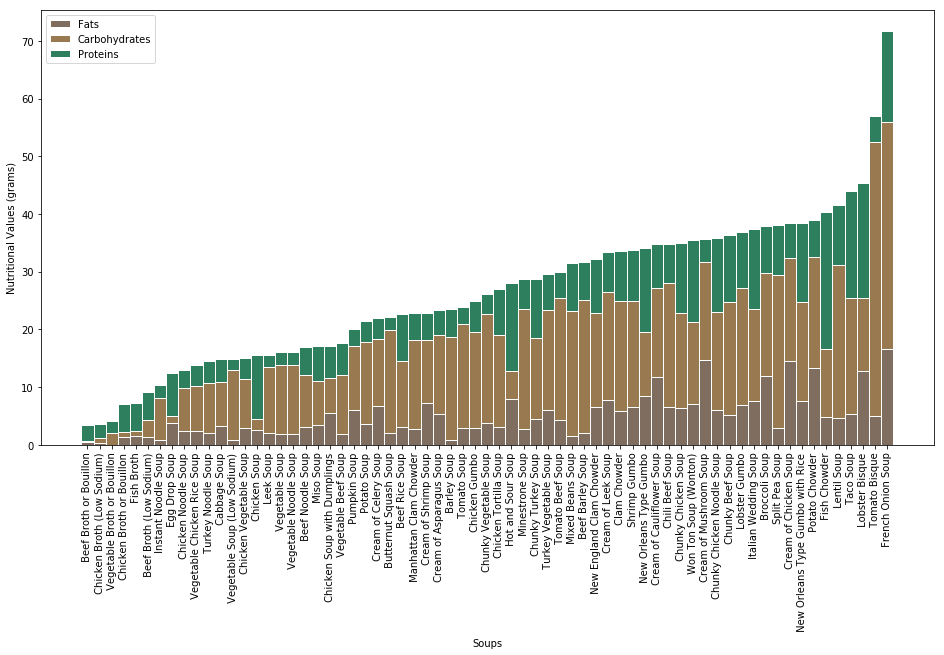

In [8]:
df3['Total Grams'] = df3['Fats'] + df3['Carbohydrates'] + df3['Proteins']
df3.sort_values(by = ['Total Grams'], inplace = True)


fig = plt.gcf()
fig.set_size_inches(16, 8)
 
# Heights of bars1 + bars2
bars = np.add(df3['Fats'], df3['Carbohydrates']).tolist()
 
# The position of the bars on the x-axis
r = []
for i in range(len(soups)):
    r.append(i)

barWidth = 1
 
# Create brown bars
f = plt.bar(r, df3['Fats'], color='#7f6d5f', edgecolor='white', width=barWidth, label = 'Fats')
# Create tortilla-colored bars (middle), on top of the first ones
c = plt.bar(r, df3['Carbohydrates'], bottom=df3['Fats'], color='#997950', edgecolor='white', width=barWidth, label = 'Carbohydrates')
# Create green bars (top)
p = plt.bar(r, df3['Proteins'], bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth, label = 'Proteins')

# Create legend
plt.legend(handles = [f, c, p])


# Custom X axis
#(str(e) for e in r)
plt.xticks(r, df3['Soups'], rotation = 90)
plt.xlabel("Soups")
plt.ylabel("Nutritional Values (grams)")
 
# Show graphic
plt.show()

# Save plot
fig.savefig('beautifulsoups.png', dpi=100)


In [9]:

f = []
c = []
p = []
totals = []
for i in range(1, num_soups + 1):
    fat_total = 0
    carb_total = 0
    protein_total = 0
    for idx in range(len(soups)):
        if (group_ids[idx] == i):
            fat_total += fats[idx]
            carb_total += carbs[idx]
            protein_total += proteins[idx]
    f.append(fat_total)
    c.append(carb_total)
    p.append(protein_total)
    
totals = [f[i] + c[i] + p[i] for i in range(len(f))]
print(f, '\n', c, '\n', p, '\n', totals)

[75.82000000000004, 76.26, 22.87, 68.14, 17.78, 33.34, 32.23, 5.06] 
 [285.96, 245.28000000000003, 83.2, 105.30000000000001, 60.14, 81.60000000000001, 83.76, 7.82] 
 [102.98, 150.44999999999996, 41.54, 37.089999999999996, 24.53, 53.040000000000006, 52.14, 21.76] 
 [464.76000000000005, 471.99, 147.61, 210.53, 102.45, 167.98000000000002, 168.13, 34.64]


AttributeError: Unknown property bold

<Figure size 432x288 with 0 Axes>

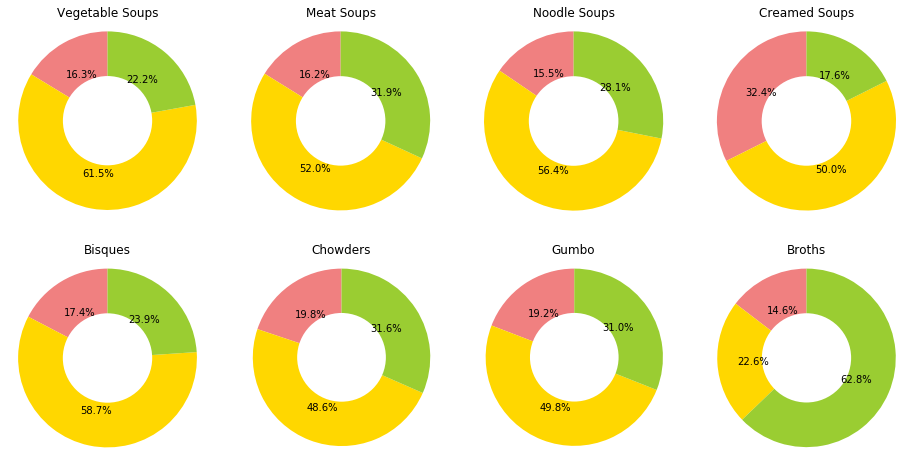

In [36]:
# Data to plot
labels = ['Fats', 'Carbohydrates', 'Proteins']
colors = [ 'lightcoral', 'gold', 'yellowgreen'] #, 'lightskyblue']

fig = plt.gcf()
fig, axes= plt.subplots(2, 4)
fig.set_size_inches(16, 8)


for i, ax in enumerate(axes.flatten()):
    data = [f[i], c[i], p[i]]
    ax.pie(data, colors = colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(type_names[i])
    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    ax.add_artist(centre_circle)
    ax.axis('equal')  

fig.suptitle('Pie Charts for Average Nutrition Breakdown by Soup Type')
fig.legend(labels,loc=1)
plt.show()